In [418]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as stat
from scipy.stats import gaussian_kde
from scipy.integrate import simps
import scipy.stats as stats

In [497]:
df = pd.read_csv(r"C:\Users\Axel\Desktop\Data Science\insurance\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


## Langkah #1 - Analisa Descriptive Statistic

c. Berapa rata rata umur pada data tersebut?

In [420]:
mean_age = df["age"].mean()
mean_bmi = df["bmi"].mean()
mean_children = df["children"].mean()
mean_charges = df["charges"].mean()
stdev_age = stat.stdev(df["age"])
stdev_bmi = stat.stdev(df["bmi"])
stdev_children = stat.stdev(df["children"])
stdev_charges = stat.stdev(df["charges"])

print(f"Rerata umur adalah {mean_age:.2f} tahun dengan standar deviasi {stdev_age:.2f}")
print(f"Rerata BMI adalah {mean_bmi:.2f} dengan standar deviasi {stdev_bmi:.2f}")
print(f"Rerata jumlah anak adalah {mean_children:.2f} anak dengan standar deviasi {stdev_children:.2f}")
print(f"Rerata charges adalah {mean_charges:.2f} dengan standar deviasi {stdev_charges:.2f}")

Rerata umur adalah 39.21 tahun dengan standar deviasi 14.05
Rerata BMI adalah 30.66 dengan standar deviasi 6.10
Rerata jumlah anak adalah 1.09 anak dengan standar deviasi 1.21
Rerata charges adalah 13270.42 dengan standar deviasi 12110.01


d. Berapa rata rata nilai BMI dari yang merokok?

In [421]:
df_smoker = df[df["smoker"]=="yes"]
df_nonsmoker = df[df["smoker"]=="no"]
mean_smoker = df_smoker["bmi"].mean()
std_smoker = stat.stdev(df_smoker["bmi"])
mean_nonsmoker = df_nonsmoker["bmi"].mean()
std_nonsmoker = stat.stdev(df_nonsmoker["bmi"])
print(f"Rerata BMI perokok adalah {mean_smoker:.2f} dengan standar deviasi {std_smoker:.2f}")
print(f"Rerata BMI non-perokok adalah {mean_nonsmoker:.2f} dengan standar deviasi {std_nonsmoker:.2f}")


Rerata BMI perokok adalah 30.71 dengan standar deviasi 6.32
Rerata BMI non-perokok adalah 30.65 dengan standar deviasi 6.04


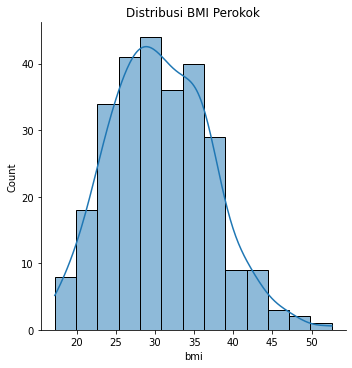

In [422]:
sns.displot(df_smoker["bmi"], kde="True").set(title='Distribusi BMI Perokok')

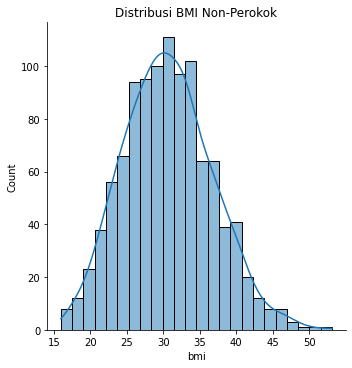

In [423]:
sns.displot(df_nonsmoker["bmi"], kde="True").set(title='Distribusi BMI Non-Perokok')

e. Apakah variansi dari data charges perokok dan non perokok sama?

In [424]:
df_smoke_charges = df_smoker["charges"].var()
df_nonsmoke_charges = df_nonsmoker["charges"].var()
print(f"Variansi data charges pada perokok adalah {df_smoke_charges:.2f}")
print(f"Variansi data charges pada non-perokok adalah {df_nonsmoke_charges:.2f}")

Variansi data charges pada perokok adalah 133207311.21
Variansi data charges pada non-perokok adalah 35925420.50


[Text(0.5, 1.0, 'Boxplot Smoker terhadap Charges')]

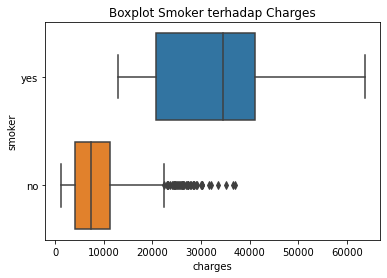

In [425]:
sns.boxplot(data=df, x="charges", y="smoker").set(title='Boxplot Smoker terhadap Charges')

f. Apakah rata-rata umur perempuan dan laki-laki yang merokok sama?

In [426]:
mean_smoke_male = df_smoker[df_smoker["sex"] == "male"]["age"].mean()
mean_smoke_female = df_smoker[df_smoker["sex"] == "female"]["age"].mean()
std_smoke_male = stat.stdev(df_smoker[df_smoker["sex"] == "male"]["age"])
std_smoke_female = stat.stdev(df_smoker[df_smoker["sex"] == "female"]["age"])
print(f"Rerata perokok laki-laki berumur {mean_smoke_male:.2f} dengan standar deviasi {std_smoke_male:.2f}")
print(f"Rerata perokok perempuan berumur {mean_smoke_female:.2f} dengan standar deviasi {std_smoke_female:.2f}")

Rerata perokok laki-laki berumur 38.45 dengan standar deviasi 13.75
Rerata perokok perempuan berumur 38.61 dengan standar deviasi 14.22


[Text(0.5, 1.0, 'Sebaran Data Umur Perokok berdasarkan Gender')]

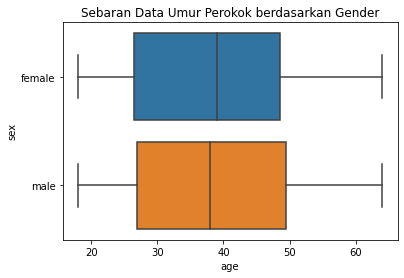

In [427]:
sns.boxplot(data=df_smoker, x="age", y="sex").set(title='Sebaran Data Umur Perokok berdasarkan Gender')

In [428]:
df_nonsmoker[df_nonsmoker["sex"] == "female"]["age"].mean()

39.691042047531994

In [429]:
df_nonsmoker[df_nonsmoker["sex"] == "male"]["age"].mean()

39.06189555125725

g. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok atau non merokok?

In [430]:
mean_smoker = df_smoker["charges"].mean()
mean_nonsmoker = df_nonsmoker["charges"].mean()
df_smoke_charges = df_smoker["charges"].var()
df_nonsmoke_charges = df_nonsmoker["charges"].var()
print(f"Rerata tagihan perokok adalah {mean_smoker:.2f} dengan standar deviasi {df_smoke_charges:.2f}")
print(f"Rerata tagihan non-perokok adalah  {mean_nonsmoker:.2f} dengan standar deviasi {df_nonsmoke_charges:.2f}")

Rerata tagihan perokok adalah 32050.23 dengan standar deviasi 133207311.21
Rerata tagihan non-perokok adalah  8434.27 dengan standar deviasi 35925420.50


<AxesSubplot:xlabel='charges', ylabel='smoker'>

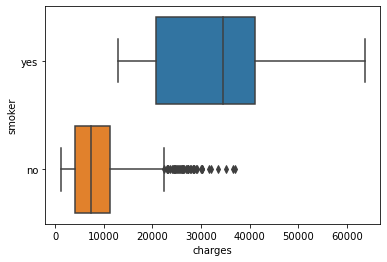

In [431]:
sns.boxplot(data=df, x="charges", y="smoker")

h. Mana yang lebih tinggi, rata rata tagihan kesehatan perokok yang BMI nya diatas 25 atau non perokok yang BMI nya diatas 25

In [432]:
mean_bmi_smoker = df_smoker[df_smoker["bmi"]>=25]["charges"].mean()
mean_bmi_nonsmoker = df_nonsmoker[df_nonsmoker["bmi"]>=25]["charges"].mean()
print(f"Rerata tagihan perokok dengan BMI diatas 25 adalah {mean_bmi_smoker:.2f}")
print(f"Rerata tagihan non-perokok dengan BMI diatas 25 adalah  {mean_bmi_nonsmoker:.2f}")

Rerata tagihan perokok dengan BMI diatas 25 adalah 35116.91
Rerata tagihan non-perokok dengan BMI diatas 25 adalah  8633.96


i. BMI mana yang lebih tinggi, seseorang laki-laki atau perempuan?

In [433]:
mean_bmi_female = df[df["sex"] == "female"]["bmi"].mean()
mean_bmi_male = df[df["sex"] == "male"]["bmi"].mean()
stdev_bmi_female = stat.stdev(df[df["sex"] == "female"]["bmi"])
stdev_bmi_male = stat.stdev(df[df["sex"] == "male"]["bmi"])
print(f"Rerata BMI perempuan adalah {mean_bmi_female:.2f} dengan standar deviasi {stdev_bmi_female:.2f}")
print(f"Rerata BMI laki-laki adalah {mean_bmi_male:.2f} dengan standar deviasi {stdev_bmi_male:.2f}")

Rerata BMI perempuan adalah 30.38 dengan standar deviasi 6.05
Rerata BMI laki-laki adalah 30.94 dengan standar deviasi 6.14


[Text(0.5, 1.0, 'Sebaran Data BMI berdasarkan Gender ')]

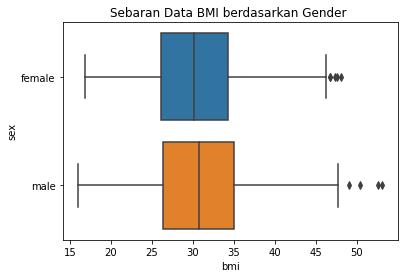

In [434]:
sns.boxplot(data=df, x="bmi", y="sex").set(title='Sebaran Data BMI berdasarkan Gender ')

j. BMI mana yang lebih tinggi, seseorang perokok atau non perokok?

In [435]:
mean_bmi_smoker = df_smoker["bmi"].mean()
mean_bmi_nonsmoker = df_nonsmoker["bmi"].mean()
stdev_bmi_smoker = stat.stdev(df_smoker["bmi"])
stdev_bmi_nonsmoker = stat.stdev(df_nonsmoker["bmi"])
print(f"Rerata BMI perokok adalah {mean_bmi_smoker:.2f} tahun dengan standar deviasi {stdev_bmi_smoker:.2f}")
print(f"Rerata BMI non-perokok adalah {mean_bmi_nonsmoker:.2f} tahun dengan standar deviasi {stdev_bmi_nonsmoker:.2f}")

Rerata BMI perokok adalah 30.71 tahun dengan standar deviasi 6.32
Rerata BMI non-perokok adalah 30.65 tahun dengan standar deviasi 6.04


[Text(0.5, 1.0, 'Sebaran Data BMI berdasarkan Perokok/Tidak Perokok')]

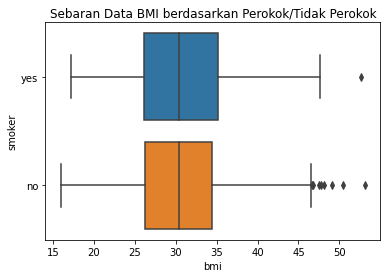

In [436]:
sns.boxplot(data=df, x="bmi", y="smoker").set(title='Sebaran Data BMI berdasarkan Perokok/Tidak Perokok')

### Langkah #2 - Analisa Variabel Kategorik (PMF)

a. Gender mana yang memiliki tagihan paling tinggi?

In [437]:
mean_charge_male = df[df["sex"] == "male"]["charges"].mean()
mean_charge_female = df[df["sex"] == "female"]["charges"].mean()
stdev_charge_male = stat.stdev(df[df["sex"] == "male"]["charges"])
stdev_charge_female = stat.stdev(df[df["sex"] == "female"]["charges"])
print(f"Rerata tagihan laki-laki adalah {mean_charge_male:.2f} tahun dengan standar deviasi {stdev_charge_male:.2f}")
print(f"Rerata tagihan perempuan adalah {mean_charge_female:.2f} tahun dengan standar deviasi {stdev_charge_female:.2f}")

Rerata tagihan laki-laki adalah 13956.75 tahun dengan standar deviasi 12971.03
Rerata tagihan perempuan adalah 12569.58 tahun dengan standar deviasi 11128.70


[Text(0.5, 1.0, 'Sebaran Data Tagihan berdasarkan Gender')]

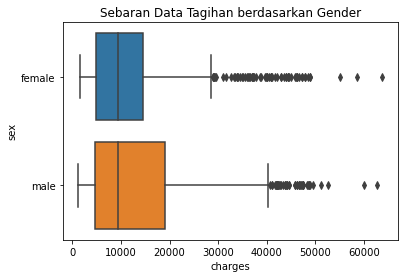

In [438]:
sns.boxplot(data=df, x="charges", y="sex").set(title='Sebaran Data Tagihan berdasarkan Gender')

b. Distribusi peluang tagihan di tiap-tiap region

In [439]:
df_region = pd.DataFrame(df.groupby(["region"])["age"].count())
df_region.rename(columns={"age":"jumlahuser"},inplace=True)
total_user = df_region.sum()[0]
df_region["peluang"] = df_region["jumlahuser"]/total_user
df_region

,jumlahuser,peluang
region,,
northeast,324,0.242152
northwest,325,0.242900
southeast,364,0.272048
southwest,325,0.242900


c. Apakah setiap region memiliki proporsi data banyak orang yang sama?

In [440]:
df_region

,jumlahuser,peluang
region,,
northeast,324,0.242152
northwest,325,0.242900
southeast,364,0.272048
southwest,325,0.242900


Setiap region memiliki proporsi data banyak orang yang berbeda

d. Mana yang lebih tinggi proporsi perokok atau non perokok?

In [441]:
count_smoker = df[df["smoker"]=="yes"]["age"].count()
count_nonsmoker = df[df["smoker"]=="no"]["age"].count()


prop_smoker = count_smoker/(count_nonsmoker+count_smoker)
prop_nonsmoker = count_nonsmoker/(count_nonsmoker+count_smoker)

print(f"Jumlah dari perokok dalam sample adalah {count_smoker} dengan proporsi {prop_smoker:.2f}")
print(f"Jumlah dari non-perokok dalam sample adalah {count_nonsmoker} dengan proporsi {prop_nonsmoker:.2f}")


Jumlah dari perokok dalam sample adalah 274 dengan proporsi 0.20
Jumlah dari non-perokok dalam sample adalah 1064 dengan proporsi 0.80


[Text(0.5, 1.0, 'Proporsi Perokok dibanding Non-Perokok')]

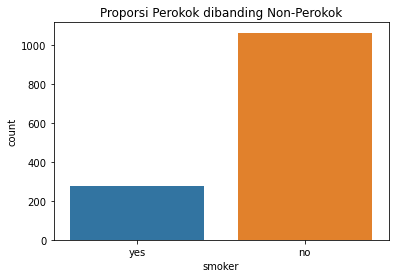

In [442]:
sns.countplot(data=df, x="smoker").set(title='Proporsi Perokok dibanding Non-Perokok')

Proporsi non perokok lebih banyak dibanding perokok

e. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok?

In [443]:
n_female = df[df["sex"]=="female"].shape[0]
n_data = len(df.index)
prob_female = n_female/n_data

n_smoker = df[df["smoker"]=="yes"].shape[0]
prob_smoker = n_smoker/n_data

n_fem_smoker = df[(df["smoker"]=="yes")&(df["sex"]=="female")].shape[0]
prob_fem_smoker = n_fem_smoker/n_data

prob_fem_given_smoker = prob_fem_smoker / prob_smoker
print(f"Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah {prob_fem_given_smoker:.4f}")

Peluang seseorang tersebut adalah perempuan diketahui dia adalah perokok adalah 0.4197


f. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok?

In [444]:
n_male = df[df["sex"]=="male"].shape[0]
n_data = len(df.index)
prob_male = n_male/n_data

n_smoker = df[df["smoker"]=="yes"].shape[0]
prob_smoker = n_smoker/n_data

n_male_smoker = df[(df["smoker"]=="yes")&(df["sex"]=="male")].shape[0]
prob_male_smoker = n_male_smoker/n_data

prob_male_given_smoker = prob_male_smoker / prob_smoker
print(f"Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok adalah {prob_male_given_smoker:.4f}")

Peluang seseorang tersebut adalah laki-laki diketahui dia adalah perokok adalah 0.5803


g. Bagaimana bentuk distribusi tagihan dari tiap-tiap region?

In [445]:
df_northeast = df[df["region"]=="northeast"].sort_values(by="charges")
df_northwest = df[df["region"]=="northwest"].sort_values(by="charges")
df_southeast = df[df["region"]=="southeast"].sort_values(by="charges")
df_southwest = df[df["region"]=="southwest"].sort_values(by="charges")
median_northeast = stat.median(df_northeast["charges"])
median_northwest = stat.median(df_northwest["charges"])
median_southeast = stat.median(df_southeast["charges"])
median_southwest = stat.median(df_southwest["charges"])
print(f"Median tagihan untuk region Northeast adalah {median_northeast:.2f}")
print(f"Median tagihan untuk region Northwest adalah {median_northwest:.2f}")
print(f"Median tagihan untuk region Southeast adalah {median_southeast:.2f}")
print(f"Median tagihan untuk region Southwest adalah {median_southwest:.2f}")

Median tagihan untuk region Northeast adalah 10057.65
Median tagihan untuk region Northwest adalah 8965.80
Median tagihan untuk region Southeast adalah 9294.13
Median tagihan untuk region Southwest adalah 8798.59


#### Distribusi Pengguna Region Northeast

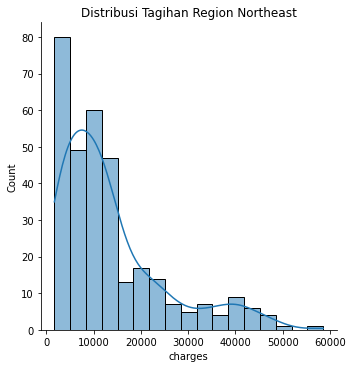

In [446]:
sns.displot(df_northeast["charges"], kde="True").set(title="Distribusi Tagihan Region Northeast")

#### Distribusi Pengguna Region Northwest

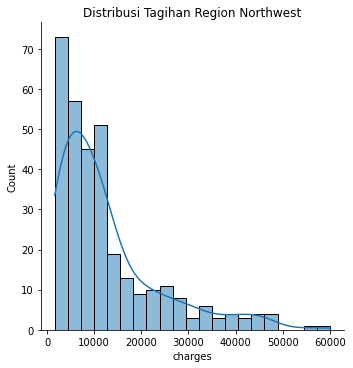

In [447]:
sns.displot(df_northwest["charges"], kde="True").set(title="Distribusi Tagihan Region Northwest")

#### Distribusi Pengguna Region Southeast

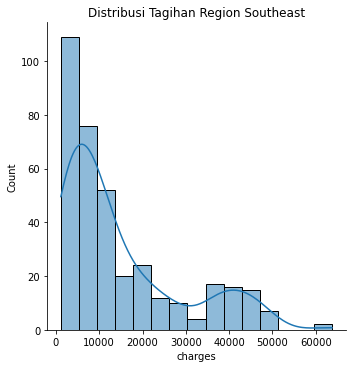

In [448]:
sns.displot(df_southeast["charges"], kde="True").set(title="Distribusi Tagihan Region Southeast")

#### Distribusi Pengguna Region Southwest

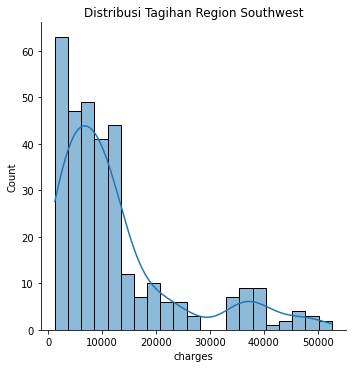

In [449]:
sns.displot(df_southwest["charges"], kde="True").set(title="Distribusi Tagihan Region Southwest")

### Langkah #3 - Analisa Variabel Kontinu (CDF)

1. Mencari peluang besar tagihan berdasarkan BMI

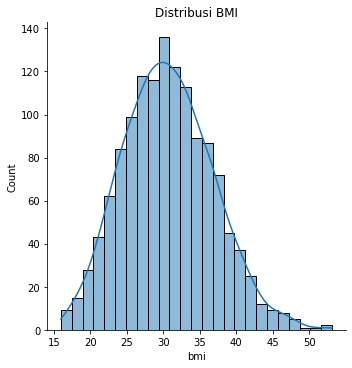

In [450]:
sns.displot(df["bmi"], kde="True").set(title="Distribusi BMI")

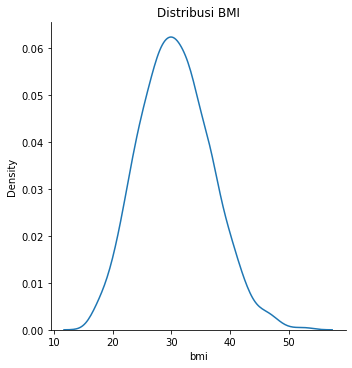

In [451]:
sns.displot(df["bmi"], kind="kde").set(title="Distribusi BMI")

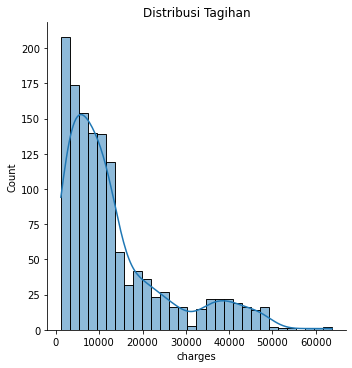

In [452]:
sns.displot(df["charges"], kde="True").set(title="Distribusi Tagihan")

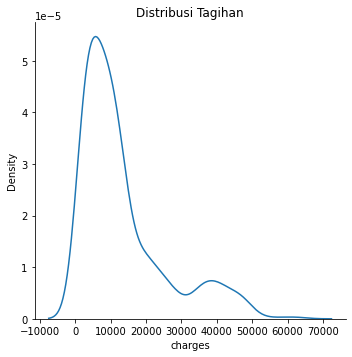

In [453]:
sns.displot(df["charges"], kind="kde").set(title="Distribusi Tagihan")


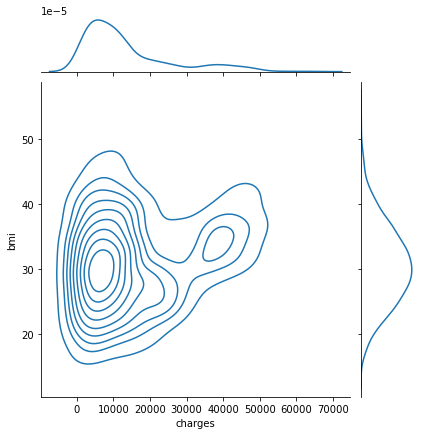

In [454]:
sns.jointplot(x='charges', y='bmi', data=df, kind='kde')

2. Mencari kemungkin terjadi, seorang perokok dengan BMI diatas 25 akan mendapatkan
tagihan kesehatan di atas 16.700.

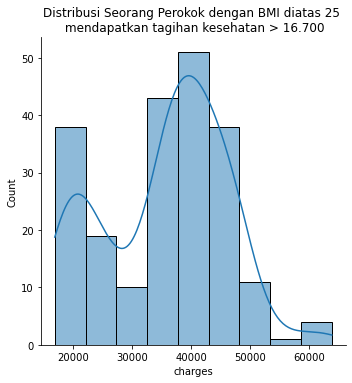

In [455]:
df_smoker_bmi25 = df_smoker[df_smoker["bmi"]>=25]
df_16700 = df[df["charges"]>=16700]
df_smoker_bmi25_16700 = df_smoker_bmi25[df_smoker_bmi25["charges"]>=16700]
sns.displot(df_smoker_bmi25_16700["charges"], kde="True").set(title="Distribusi Seorang Perokok dengan BMI diatas 25 \n mendapatkan tagihan kesehatan > 16.700")

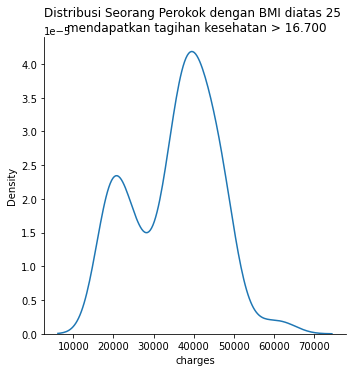

In [456]:
sns.displot(df_smoker_bmi25_16700["charges"], kind="kde").set(title="Distribusi Seorang Perokok dengan BMI diatas 25 \n mendapatkan tagihan kesehatan > 16.700")

In [457]:
n_smoker_bmi25_16700 = df_smoker_bmi25_16700["charges"].count()
n_smoker_bmi25 = df_smoker_bmi25["charges"].count()
n_16700 = df_16700["charges"].count()
n_data = df['charges'].count()

prob_smoker_bmi25 = n_smoker_bmi25 / n_data
prob_16700 = n_16700 / n_data
prob_smoker_bmi25_16700 = n_smoker_bmi25_16700 / n_data
prob_smoker_bmi25_given_16700 = prob_smoker_bmi25_16700 / prob_smoker_bmi25

print(f"Peluang seseorang tersebut perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16.700 adalah {prob_smoker_bmi25_given_16700:.4f}")

Peluang seseorang tersebut perokok dengan BMI diatas 25 akan mendapatkan tagihan kesehatan diatas 16.700 adalah 0.9817


3. Berapa peluang seseorang acak tagihan kesehatannya diatas 16.7k diketahui dia adalah
perokok

In [458]:
n_data = df['charges'].count()
n_smoker_16700 = df_smoker[df_smoker["charges"]>=16700]["charges"].count()

p_smoker = df_smoker["charges"].count() / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_smoker_16700 = n_smoker_16700 / n_data
p_16700_given_smoker = p_smoker_16700 / p_smoker

print(f"Peluang seseorang tersebut perokok akan mendapatkan tagihan kesehatan diatas 16.700  adalah {p_16700_given_smoker:.4f}")

Peluang seseorang tersebut perokok akan mendapatkan tagihan kesehatan diatas 16.700  adalah 0.9270


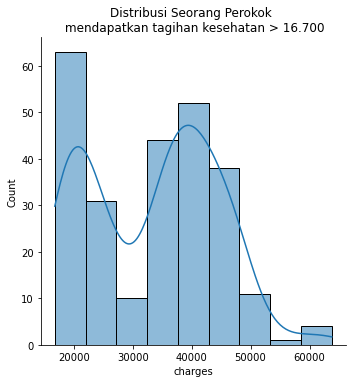

In [459]:
sns.displot(df_smoker[df_smoker["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang Perokok \n mendapatkan tagihan kesehatan > 16.700")

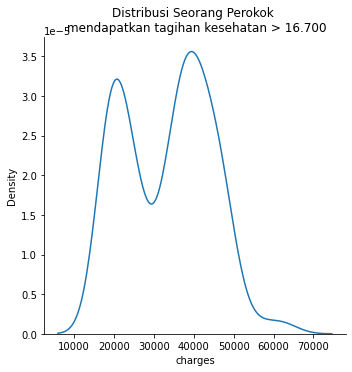

In [460]:
sns.displot(df_smoker[df_smoker["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang Perokok \n mendapatkan tagihan kesehatan > 16.700")

4. Mana yang lebih mungkin terjadi
a. Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k,
atau
b. Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

In [461]:
df_bmi_up = df[df["bmi"]>=25]
df_bmi_down = df[df["bmi"]<25]

#Seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_up = df_bmi_up["charges"].count()
n_bmi_up_16700 = df_bmi_up[df_bmi_up["charges"]>=16700]["charges"].count()

p_bmi_up = n_bmi_up / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_up_16700 = n_bmi_up_16700 / n_data
p_16700_given_bmi_up = p_bmi_up_16700 / p_bmi_up

print(f"Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_up:.4f}")

Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k adalah 0.2589


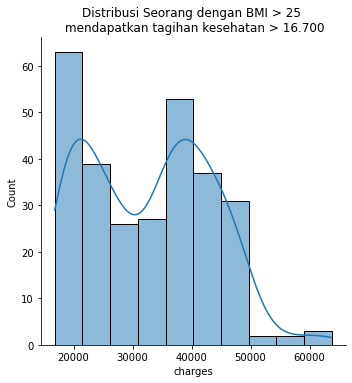

In [462]:
sns.displot(df_bmi_up[df_bmi_up["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI > 25 \n mendapatkan tagihan kesehatan > 16.700")

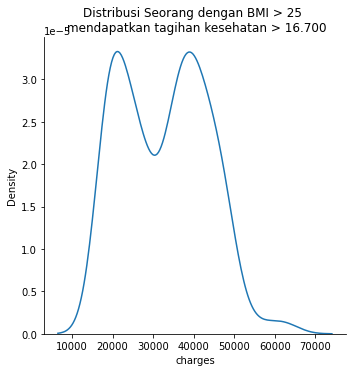

In [463]:
sns.displot(df_bmi_up[df_bmi_up["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI > 25 \n mendapatkan tagihan kesehatan > 16.700")

In [464]:
#Seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_down = df_bmi_down["charges"].count()
n_bmi_down_16700 = df_bmi_down[df_bmi_down["charges"]>=16700]["charges"].count()

p_bmi_down = n_bmi_down / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_down_16700 = n_bmi_down_16700 / n_data
p_16700_given_bmi_down = p_bmi_down_16700 / p_bmi_down
p_16700_given_bmi_down

print(f"Peluang seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_down:.4f}")

print("Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k lebih tinggi dibanding seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k")

Peluang seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k adalah 0.2082
Peluang seseorang dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k lebih tinggi dibanding seseorang dengan BMI dibawah 25 mendapatkan tagihan kesehatan diatas 16.7k


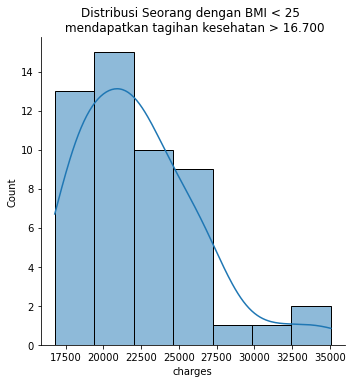

In [465]:
sns.displot(df_bmi_down[df_bmi_down["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

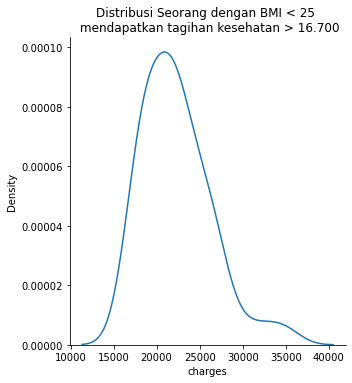

In [466]:
sns.displot(df_bmi_down[df_bmi_down["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

5. Mana yang lebih mungkin terjadi
a. Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k, atau 
b. Seseorang non perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan
diatas 16.7k

In [467]:
df_bmi_up_smoke = df_smoker[df_smoker["bmi"]>=25]
df_bmi_up_nonsmoke = df_nonsmoker[df_nonsmoker["bmi"]>=25]

#Seseorang perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_up_smoke = df_bmi_up_smoke["charges"].count()
n_bmi_up_smoke_16700 = df_bmi_up_smoke[df_bmi_up_smoke["charges"]>=16700]["charges"].count()

p_bmi_up_smoke = n_bmi_up_smoke / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_up_smoke_16700 = n_bmi_up_smoke_16700 / n_data
p_16700_given_bmi_up_smoke = p_bmi_up_smoke_16700 / p_bmi_up_smoke

print(f"Peluang seseorang perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_up_smoke:.4f}")


Peluang seseorang perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah 0.9817


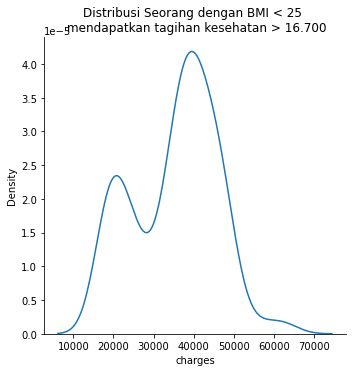

In [468]:
sns.displot(df_bmi_up_smoke[df_bmi_up_smoke["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

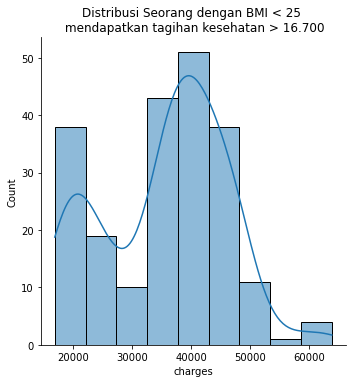

In [469]:
sns.displot(df_bmi_up_smoke[df_bmi_up_smoke["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

In [470]:
#Seseorang non-perokok dengan BMI diatas 25 mendapatkan tagihan kesehatan diatas 16.7k

n_data = df['charges'].count()
n_bmi_up_nonsmoke = df_bmi_up_nonsmoke["charges"].count()
n_bmi_up_nonsmoke_16700 = df_bmi_up_nonsmoke[df_bmi_up_nonsmoke["charges"]>=16700]["charges"].count()

p_bmi_up_nonsmoke = n_bmi_up_nonsmoke / n_data
p_16700 = df[df["charges"]>=16700]["charges"].count() / n_data
p_bmi_up_nonsmoke_16700 = n_bmi_up_nonsmoke_16700 / n_data
p_16700_given_bmi_up_nonsmoke = p_bmi_up_nonsmoke_16700 / p_bmi_up_nonsmoke

print(f"Peluang seseorang non-perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah {p_16700_given_bmi_up_nonsmoke:.4f}")


Peluang seseorang non-perokok dengan BMI diatas 25  mendapatkan tagihan kesehatan diatas 16.7k adalah 0.0778


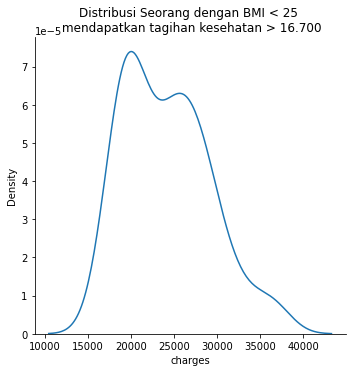

In [471]:
sns.displot(df_bmi_up_nonsmoke[df_bmi_up_nonsmoke["charges"]>=16700]["charges"], kind="kde").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

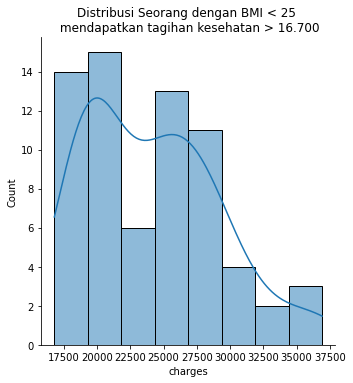

In [472]:
sns.displot(df_bmi_up_nonsmoke[df_bmi_up_nonsmoke["charges"]>=16700]["charges"], kde="True").set(title="Distribusi Seorang dengan BMI < 25 \n mendapatkan tagihan kesehatan > 16.700")

### Langkah #4 - Analisa Korelasi Variabel

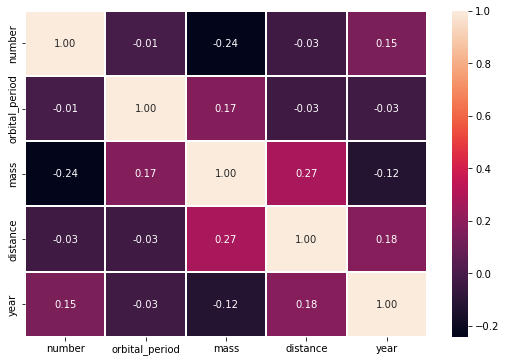

In [474]:
corr = df.corr()

f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr, annot=True, linewidth=1.5, fmt ='.2f', ax=ax)
plt.show()

In [475]:
corr

,number,orbital_period,mass,distance,year
number,1.000000,-0.012570,-0.241429,-0.033638,0.147849
orbital_period,-0.012570,1.000000,0.173725,-0.034365,-0.032333
mass,-0.241429,0.173725,1.000000,0.274082,-0.123787
distance,-0.033638,-0.034365,0.274082,1.000000,0.178922
year,0.147849,-0.032333,-0.123787,0.178922,1.000000


In [505]:
pd_transform = pd.get_dummies(df, columns=['region','smoker','sex'])

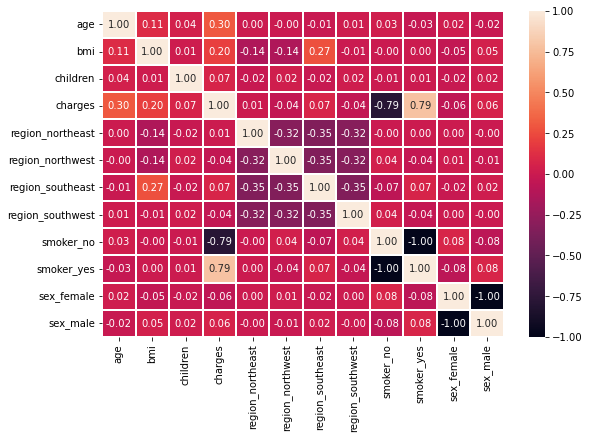

In [477]:
corr2 = pd_transform.corr()

f, ax = plt.subplots(figsize=(9,6))
sns.heatmap(corr2, annot=True, linewidth=1.5, fmt ='.2f', ax=ax)
plt.show()

In [478]:
corr2

,age,bmi,children,charges,region_northeast,region_northwest,region_southeast,region_southwest,smoker_no,smoker_yes,sex_female,sex_male
age,1.000000,0.109272,0.042469,0.299008,0.002475,-0.000407,-0.011642,0.010016,0.025019,-0.025019,0.020856,-0.020856
bmi,0.109272,1.000000,0.012759,0.198341,-0.138156,-0.135996,0.270025,-0.006205,-0.003750,0.003750,-0.046371,0.046371
children,0.042469,0.012759,1.000000,0.067998,-0.022808,0.024806,-0.023066,0.021914,-0.007673,0.007673,-0.017163,0.017163
charges,0.299008,0.198341,0.067998,1.000000,0.006349,-0.039905,0.073982,-0.043210,-0.787251,0.787251,-0.057292,0.057292
region_northeast,0.002475,-0.138156,-0.022808,0.006349,1.000000,-0.320177,-0.345561,-0.320177,-0.002811,0.002811,0.002425,-0.002425
region_northwest,-0.000407,-0.135996,0.024806,-0.039905,-0.320177,1.000000,-0.346265,-0.320829,0.036945,-0.036945,0.011156,-0.011156
region_southeast,-0.011642,0.270025,-0.023066,0.073982,-0.345561,-0.346265,1.000000,-0.346265,-0.068498,0.068498,-0.017117,0.017117
region_southwest,0.010016,-0.006205,0.021914,-0.043210,-0.320177,-0.320829,-0.346265,1.000000,0.036945,-0.036945,0.004184,-0.004184
smoker_no,0.025019,-0.003750,-0.007673,-0.787251,-0.002811,0.036945,-0.068498,0.036945,1.000000,-1.000000,0.076185,-0.076185
smoker_yes,-0.025019,0.003750,0.007673,0.787251,0.002811,-0.036945,0.068498,-0.036945,-1.000000,1.000000,-0.076185,0.076185


### Langkah #5 - Hypotesis Testing

a. Tagihan kesehatan perokok lebih tinggi daripada tagihan kesehatan non perokok

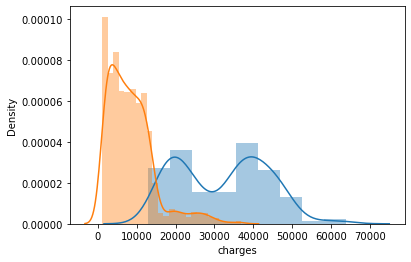

In [479]:
# plotting charges smoker and charges non-smoker distribution on the same figure
fig_a = sns.distplot(df_smoker["charges"], axlabel='charges', kde=True)
fig_b = sns.distplot(df_nonsmoker["charges"], axlabel='charges', kde=True)
plt.show()

In [480]:
smoker_series = pd.Series(df_smoker["charges"]).array
nonsmoker_series = pd.Series(df_nonsmoker["charges"]).array

In [481]:
from scipy.stats import ttest_ind

t, pvalue = stats.mannwhitneyu(smoker_series, nonsmoker_series, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print(f'Statistics = {t}, p-value = {pvalue}')

Statistics = 284133.0, p-value = 1.0


b. Tagihan kesehatan dengan BMI diatas 25 lebih tinggi daripada tagihan kesehatan dengan BMI dibawah 25

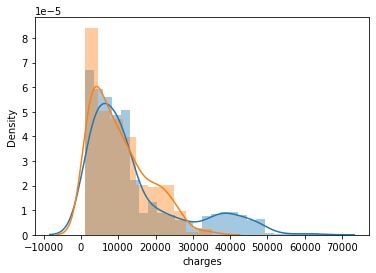

In [503]:
# plotting charges bmi > 25 and charges bmi < 25 distribution on the same figure
fig_c = sns.distplot(df[df["bmi"]>=25]["charges"], axlabel='charges', kde=True)
fig_d = sns.distplot(df[df["bmi"]<25]["charges"], axlabel='charges', kde=True)
plt.show()

In [504]:
bmiup25_series = pd.Series(df[df["bmi"]>=25]["charges"]).array
bmilow25_series = pd.Series(df[df["bmi"]<25]["charges"]).array

In [484]:
bmiup25_series.mean()

13940.237872405301

In [488]:
bmilow25_series.mean()

10282.224474367351

In [489]:
t, pvalue = stats.mannwhitneyu(bmiup25_series, bmilow25_series, alternative='less') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print(f'Statistics = {t}, p-value = {pvalue}')

Statistics = 148803.0, p-value = 0.996812175836968


c. BMI laki-laki dan perempuan sama

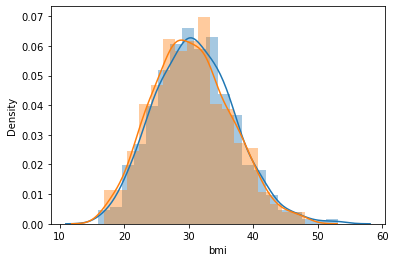

In [498]:
# plotting bmi male and bmi female distribution on the same figure
fig_c = sns.distplot(df[df["sex"]=="male"]["bmi"], axlabel='bmi', kde=True)
fig_d = sns.distplot(df[df["sex"]=="female"]["bmi"], axlabel='bmi', kde=True)
plt.show()

In [499]:
bmi_male_series = pd.Series(df[df["sex"]=="male"]["bmi"]).array
bmi_female_series = pd.Series(df[df["sex"]=="female"]["bmi"]).array

In [500]:
from scipy.stats import ttest_ind

stat, p = ttest_ind(a = bmi_male_series, b = bmi_female_series, equal_var=False, alternative='two-sided') # eaual_var= False karena varians kedua populasi berbeda

# Interpretasi Hasil
print(f'Statistics = {stat}, p-value = {p}')

Statistics = 1.697027933124022, p-value = 0.08992430667834876


d. Tagihan kesehatan laki-laki lebih besar dari perempuan

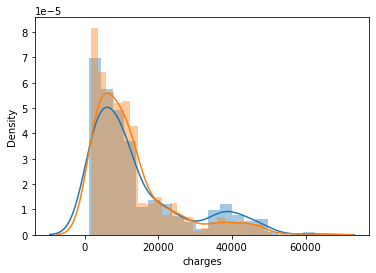

In [501]:
# plotting charges male and charges female distribution on the same figure
fig_e = sns.distplot(df[df["sex"]=="male"]["charges"], axlabel='charges', kde=True)
fig_f = sns.distplot(df[df["sex"]=="female"]["charges"], axlabel='charges', kde=True)
plt.show()

In [502]:
male_series = pd.Series(df[df["sex"]=="male"]["charges"]).array
female_series = pd.Series(df[df["sex"]=="female"]["charges"]).array

In [495]:
t, pvalue = stats.mannwhitneyu(male_series, female_series, alternative='less')
# Interpretasi Hasil
print(f'Statistics = {t}, p-value = {pvalue}')

Statistics = 226208.0, p-value = 0.6357276125750675


e. Proporsi perokok berbeda di tiap region

In [496]:
from statsmodels.stats.proportion import proportions_ztest

n_ne = df_northeast['age'].count()
n_nw = df_northwest['age'].count()
n_se = df_southeast['age'].count()
n_sw = df_southwest['age'].count()

n_smoke_ne = df_northeast[df_northeast["smoker"]=="yes"]["smoker"].count()
n_smoke_nw = df_northwest[df_northwest["smoker"]=="yes"]["smoker"].count()
n_smoke_se = df_southeast[df_southeast["smoker"]=="yes"]["smoker"].count()
n_smoke_sw = df_southwest[df_southwest["smoker"]=="yes"]["smoker"].count()

p_smoke_ne = n_smoke_ne/n_ne
p_smoke_nw = n_smoke_nw/n_nw
p_smoke_se = n_smoke_se/n_se
p_smoke_sw = n_smoke_sw/n_sw

### *Uji statistik dilakukan pada file excel point e*